## Exploring The Data

In [85]:
# Lets import our necessary libraries
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [86]:
# Create our list of dataframes containing each dataset
file_paths = ['../Data/dataset83.csv', '../Data/dataset84.csv', '../Data/dataset85.csv']
dfs = []

for file_path in file_paths:
    dfs.append(pd.read_csv(file_path))

In [103]:
# Remove unecessary data
for df in dfs:
    df.drop(['Year_start', 'Year_end'], axis='columns', inplace=True)

KeyError: "['Year_start', 'Year_end'] not found in axis"

In [88]:
# Encode Categorical Data into numerical format
label_encoder = LabelEncoder()

for df in dfs:
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])


In [91]:
# now our data is in a format fit for a model, we need to decide what model and what we want the model to be able to do, maybe first we should see if it can guess teh species and population based on the other data

X = df_83.drop(columns='Species')
y = df_83['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)
 
estimators = [
    ('clf', XGBClassifier(random_state=69))
]

pipe = Pipeline(steps=estimators)

In [93]:


search_space = {
    'clf__max_depth': Integer(2, 8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=69)

In [94]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [95]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.6393981745580827,
                               colsample_bynode=0.5761510354105226,
                               colsample_bytree=0.7159727432476634, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.2943280099491286,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.05459825157925628, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=69, ...))])

In [96]:
opt.best_score_

0.8451681833070781

In [97]:
opt.score(X_test, y_test)

0.856145251396648

In [98]:
opt.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [99]:
opt.predict_proba(X_test)

array([[0.2732157 , 0.7267843 ],
       [0.6089951 , 0.39100495],
       [0.7151905 , 0.28480953],
       [0.48020774, 0.51979226],
       [0.5685369 , 0.4314631 ],
       [0.73680115, 0.26319888],
       [0.42690206, 0.57309794],
       [0.78881633, 0.21118364],
       [0.51556945, 0.48443052],
       [0.40908062, 0.5909194 ],
       [0.34299123, 0.65700877],
       [0.17802173, 0.8219783 ],
       [0.14134479, 0.8586552 ],
       [0.2852865 , 0.7147135 ],
       [0.66666555, 0.33333445],
       [0.33050877, 0.66949123],
       [0.41121382, 0.5887862 ],
       [0.81601167, 0.18398836],
       [0.46199405, 0.53800595],
       [0.5042003 , 0.49579972],
       [0.39528835, 0.60471165],
       [0.86766106, 0.13233893],
       [0.3456056 , 0.6543944 ],
       [0.38988972, 0.6101103 ],
       [0.30405927, 0.69594073],
       [0.16480738, 0.8351926 ],
       [0.6676985 , 0.3323015 ],
       [0.6294844 , 0.37051558],
       [0.5813949 , 0.4186051 ],
       [0.66660666, 0.3333933 ],
       [0.

In [100]:
opt.best_estimator_.steps

[('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.6393981745580827,
                colsample_bynode=0.5761510354105226,
                colsample_bytree=0.7159727432476634, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.2943280099491286,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.05459825157925628,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=69, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

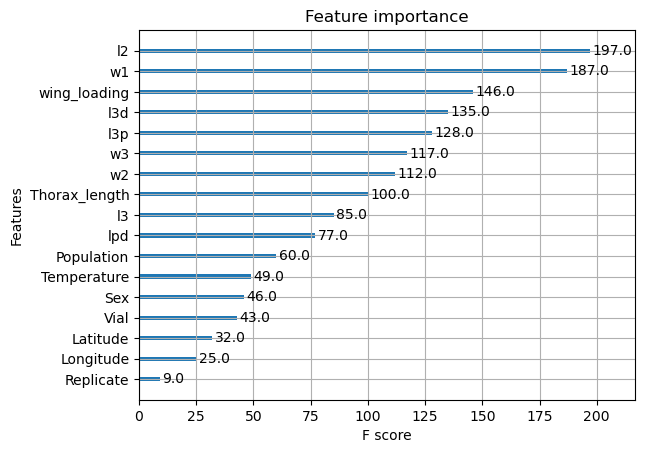

In [101]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[0]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

In [102]:
# Okay cool now lets set it up to use this pipeline on each dataset and see which features are overall the most important indicators thats an interesting insight. 